In [162]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [163]:
data = pd.read_excel("Pràctiques/Entrega/Dades_seleccionades_noms.xlsx")
data

,PROVINCIA,LLOC_NAIX,SEXE,EDAT,ESTAT_CIVIL_2,FILLS,LLENGUA_IDENTIFICACIO,SIT_LAB_1_2,ESTUDIS_1_6,INTERES_POL,...,ACORD_FEMINISME_CLAU,ACORD_FEMINISME_HOMES,SATISFACCIO_GLOBAL,CURA_MENOR_7DIES_FILLS,CURA_MENOR_7DIES_FAMILIA,CURA_MENOR_7DIES_AMICS,CURA_MENOR_7DIES_NO,RELIGIO,GENERE,CLASSE_SOCIAL_SUBJECTIVA_1_7
0,Girona,Catalunya,Femení,31,Solter/a,0,Català,Treballo o estic temporalment de baixa,Estudis universitaris,Bastant,...,Bastant d’acord,Molt d’acord,10 Totalment satisfet/a,No,No,No,Sí,Valor perdut per omissió de la pregunta en pan...,Valor perdut per omissió de la pregunta en pan...,Valor perdut per omissió de la pregunta en pan...
1,Barcelona,Catalunya,Masculí,23,Solter/a,0,Català,Treballo o estic temporalment de baixa,Estudis universitaris,Molt,...,Bastant d’acord,Molt d’acord,7,No,No,No,Sí,Cap: soc ateu/a (nega l’existència de Déu),Home,Classe mitjana
2,Girona,Catalunya,Masculí,21,Solter/a,Valor perdut per no resposta,Català,Treballo o estic temporalment de baixa,No vaig finalitzar els estudis obligatoris (EG...,Molt,...,Bastant d’acord,Bastant d’acord,6,No,No,No,Sí,Cap: soc ateu/a (nega l’existència de Déu),Home,Valor perdut per omissió de la pregunta en pan...
3,Barcelona,Catalunya,Masculí,62,Casat/ada,2,Català,No treballo,Estudis universitaris,Molt,...,Molt d’acord,Molt d’acord,10 Totalment satisfet/a,No,No,No,Sí,Cap: soc agnòstic/a (no es posiciona sobre si ...,Home,Classe treballadora baixa
4,Barcelona,Fora d'Espanya,Femení,55,Casat/ada,1,Castellà,No treballo,Estudis universitaris,Gens,...,Gens d’acord,Bastant d’acord,7,Sí,No,No,No,Cap: soc agnòstic/a (no es posiciona sobre si ...,Dona,Valor perdut per omissió de la pregunta en pan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,Barcelona,Catalunya,Femení,51,Solter/a,Valor perdut per no resposta,Castellà,No treballo,Valor perdut per omissió de la pregunta en pan...,Poc,...,Bastant d’acord,Bastant d’acord,4,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per omissió de la pregunta en pan...,Valor perdut per omissió de la pregunta en pan...,Valor perdut per omissió de la pregunta en pan...
5709,Barcelona,Altres comunitats autònomes,Masculí,69,Casat/ada,2,Castellà,No treballo,Estudis universitaris,Molt,...,Bastant d’acord,Bastant d’acord,8,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Catolicisme,Home,Classe treballadora mitjana
5710,Lleida,Fora d'Espanya,Femení,41,Divorciat/ada,2,Altres opcions,No treballo,Vaig finalitzar els estudis obligatoris (EGB o...,Molt,...,No ho sé,No ho sé,5,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per omissió de la pregunta en pan...,Valor perdut per omissió de la pregunta en pan...,Valor perdut per omissió de la pregunta en pan...
5711,Barcelona,Catalunya,Masculí,49,Casat/ada,1,Castellà,Treballo o estic temporalment de baixa,Estudis universitaris,Molt,...,Molt d’acord,Molt d’acord,7,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per mode d'administració de l'enq...,Valor perdut per omissió de la pregunta en pan...,Home,Valor perdut per omissió de la pregunta en pan...


In [206]:
data.describe()

,EDAT
count,5713.000000
mean,50.347453
std,46.828781
min,16.000000
25%,36.000000
50%,51.000000
75%,63.000000
max,3333.000000


In [164]:
df=data
df.describe()

,EDAT
count,5713.000000
mean,50.347453
std,46.828781
min,16.000000
25%,36.000000
50%,51.000000
75%,63.000000
max,3333.000000


In [165]:
df_filtrat=df[~df.isin(['Valor perdut per omissió de la pregunta en panelistes','Valor perdut per mode d\'administració de l\'enquesta',
                        'Valor perdut per no resposta','Valor perdut per omissió de resposta',
                        'Valor perdut per prefereixo no contestar','Valor perdut per 8','Valor perdut per 7']).any(axis=1)]

In [166]:
for n in df_filtrat.columns:
    print(df_filtrat[n].unique())

['Barcelona' 'Tarragona' 'Lleida' 'Girona']
['Catalunya' "Fora d'Espanya" 'Altres comunitats autònomes']
['Masculí' 'Femení']
[ 23  55  71  68  48  64  62  19  44  47  36  60  26  31  28  61  53  21
  72  33  22  24  51  50  52  34  65  70  27  25  66  39  38  54  49  67
  56  30  42  58  63  17  35  40  45  20  76  32  59  73  91  29  43  37
  69  46  75  18  41  74  57  79  77  83  82  16  81  90  80  89  78  88
  92  85  87  84  86 102]
['Solter/a' 'Parella de fet' 'Casat/ada' 'Divorciat/ada' 'Vidu/a'
 'Separat/ada']
[0 2 3 1 4 5 8 6 9]
['Català' 'Castellà' 'Altres opcions']
['Treballo o estic temporalment de baixa' 'No treballo']
['Estudis universitaris'
 'Estudis secundaris post obligatoris (Batxillerat, BUP/COU, etc.)'
 'Vaig finalitzar els estudis obligatoris (EGB o ESO)'
 'Formació professional de grau mig (FP1, CFGM i equivalents)'
 'Formació professional de grau superior (FP2, CFGS i equivalents)'
 'Altres (Pot especificar)'
 'No vaig finalitzar els estudis obligatoris (EGB o

In [167]:
df_filtrat.describe()

,EDAT
count,3775.000000
mean,46.915232
std,16.236387
min,16.000000
25%,34.000000
50%,48.000000
75%,59.000000
max,102.000000


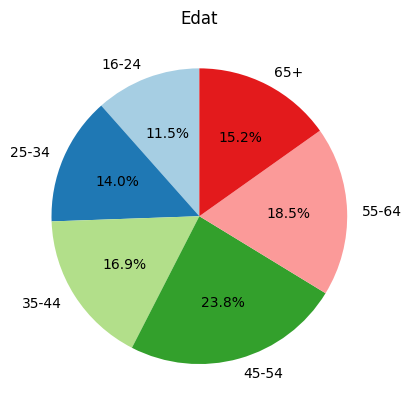

In [168]:
freq_edat=[0,0,0,0,0,0]
etiquetes = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']

for i in range(0,5):
    for n in df_filtrat['EDAT']:
        #print(n)
        if n>=i*10+15 and n<(i+1)*10+15:
            #print('a')
            freq_edat[i]+=1

for n in df_filtrat['EDAT']:
    if n>=65:
        freq_edat[5]+=1
freq_edat

plt.pie(freq_edat, labels=etiquetes, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title("Edat")

# Mostrar el diagrama
plt.show()

In [169]:
df_filtrat['EDAT'].mean()

np.float64(46.91523178807947)

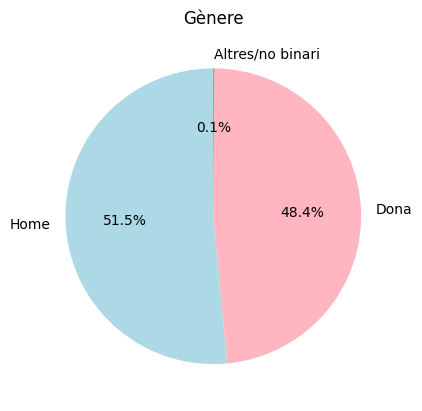

In [170]:
# Comptar les freqüències de cada gènere
freq_genere = df_filtrat['GENERE'].value_counts()

# Crear el diagrama circular
plt.pie(freq_genere, labels=freq_genere.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink', 'gray'])

# Afegir títol
plt.title("Gènere")

# Mostrar el diagrama
plt.show()

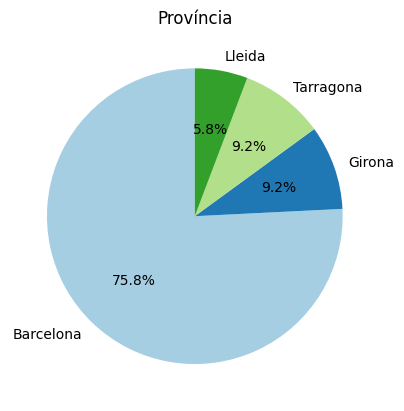

In [171]:
# Comptar les freqüències de cada gènere
freq_genere = df_filtrat['PROVINCIA'].value_counts()

# Crear el diagrama circular
plt.pie(freq_genere, labels=freq_genere.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Afegir títol
plt.title("Província")

# Mostrar el diagrama
plt.show()

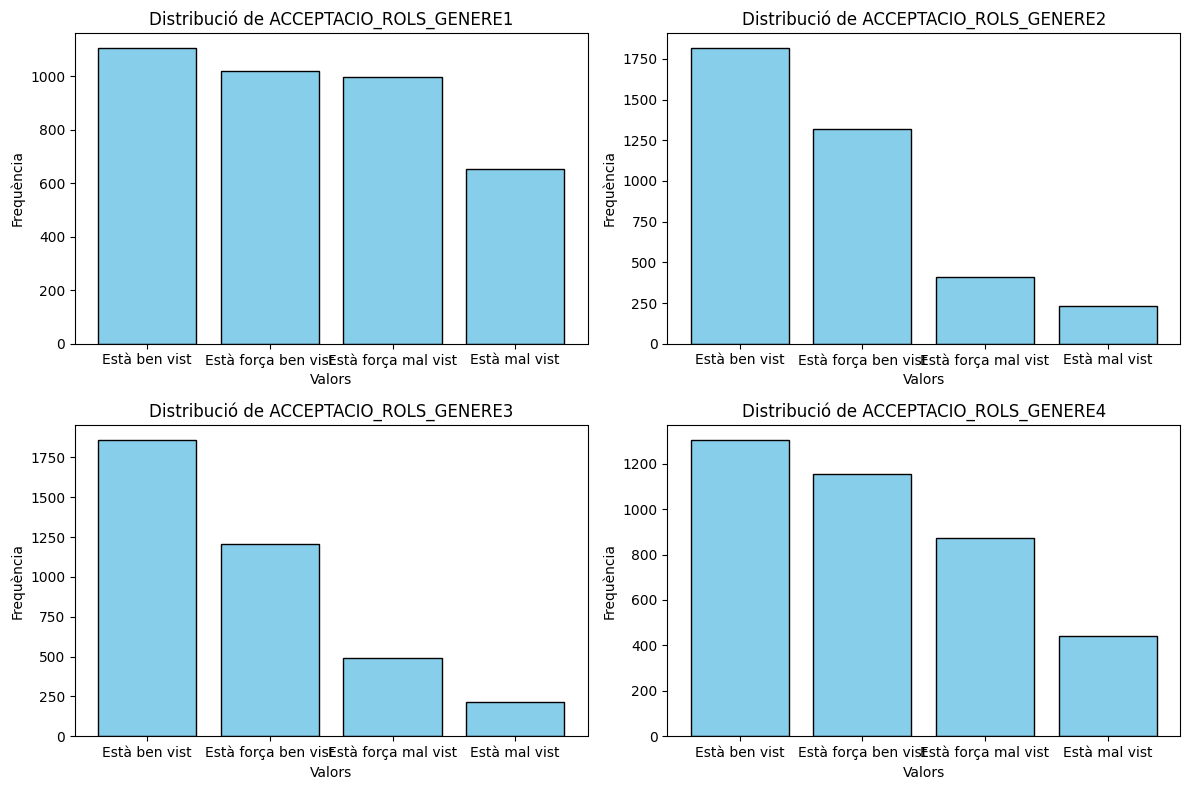

In [172]:


# Seleccionar les quatre variables d'acceptació
variables_acceptacio = ['ACCEPTACIO_ROLS_GENERE1', 'ACCEPTACIO_ROLS_GENERE2', 'ACCEPTACIO_ROLS_GENERE3', 'ACCEPTACIO_ROLS_GENERE4']

# Configurar la figura i els subgràfics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Crear una graella 2x2

# Iterar sobre les variables i els subgràfics
for var, ax in zip(variables_acceptacio, axes.flatten()):
    # Comptar les freqüències
    freq = df_filtrat[var].value_counts()
    
    # Crear un gràfic de barres per a cada variable
    ax.bar(freq.index, freq.values, color='skyblue', edgecolor='black')
    
    # Afegir títol i etiquetes
    ax.set_title(f"Distribució de {var}")
    ax.set_xlabel("Valors")
    ax.set_ylabel("Frequència")

# Ajustar el disseny perquè els gràfics no se solapin
plt.tight_layout()

# Mostrar la figura amb els quatre gràfics
plt.show()


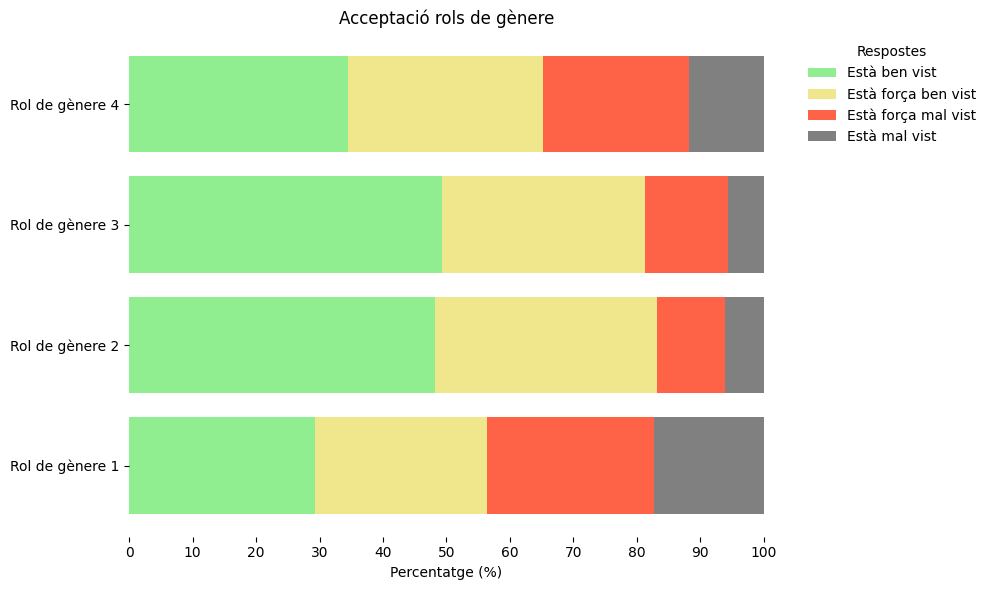

{'Està ben vist': [np.float64(29.29801324503311),
  np.float64(48.185430463576154),
  np.float64(49.24503311258278),
  np.float64(34.54304635761589)],
 'Està força ben vist': [np.float64(27.019867549668874),
  np.float64(34.94039735099338),
  np.float64(32.026490066225165),
  np.float64(30.596026490066226)],
 'Està força mal vist': [np.float64(26.384105960264904),
  np.float64(10.781456953642383),
  np.float64(13.033112582781456),
  np.float64(23.125827814569536)],
 'Està mal vist': [np.float64(17.29801324503311),
  np.float64(6.0927152317880795),
  np.float64(5.695364238410596),
  np.float64(11.735099337748345)]}

In [205]:
# Noms de les variables
variables_acceptacio = [
    'ACCEPTACIO_ROLS_GENERE1',
    'ACCEPTACIO_ROLS_GENERE2',
    'ACCEPTACIO_ROLS_GENERE3',
    'ACCEPTACIO_ROLS_GENERE4'
]

# Comptar els valors per a cada categoria en cadascuna de les variables
freq_acceptacio = {var: df_filtrat[var].value_counts(normalize=True) * 100 for var in variables_acceptacio}

# Ordenar les categories per valors comuns
categories = ['Està ben vist','Està força ben vist','Està força mal vist','Està mal vist' ]
data_apilada = {cat: [freq_acceptacio[var].get(cat, 0) for var in variables_acceptacio] for cat in categories}

# Noms personalitzats per a l'eix Y
noms_personalitzats = [
    'Rol de gènere 1',
    'Rol de gènere 2',
    'Rol de gènere 3',
    'Rol de gènere 4'
]

# Preparar les dades per a les barres apilades
bottom = np.zeros(len(variables_acceptacio))  # Base inicial de les barres comença a 0
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gràfic apilat horitzontal
colors = ['lightgreen', 'khaki', 'tomato', 'gray']
for cat, color in zip(categories, colors):
    ax.barh(noms_personalitzats, data_apilada[cat], left=bottom, label=cat, color=color)
    bottom += data_apilada[cat]  # Actualitzar la base per a la següent capa

# Configuració de l'eix X
ax.set_xlabel("Percentatge (%)")
ax.set_xlim(0, 100)  # Fixar l'eix X de 0 a 100 (percentatges)
ax.set_xticks(range(0, 101, 10))  # Ticks cada 10%

# Configuració de l'eix Y
ax.set_yticks(range(len(variables_acceptacio)))
ax.set_yticklabels(noms_personalitzats)

# Afegir títol i llegenda (sense marc negre)
ax.set_title("Acceptació rols de gènere")

ax.legend(title="Respostes", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Ajustar marges
plt.subplots_adjust(left=0.3)  # Augmentar espai per a noms llargs a l'eix Y
plt.tight_layout()

# Eliminar el fons i els marcs de la figura i els eixos
fig.patch.set_visible(False)  # Eliminar el fons de la figura
ax.spines['top'].set_visible(False)  # Eliminar el marc superior
ax.spines['right'].set_visible(False)  # Eliminar el marc dret
ax.spines['left'].set_visible(False)  # Eliminar el marc esquerre
ax.spines['bottom'].set_visible(False)  # Eliminar el marc inferior

# Mostrar el gràfic
plt.show()
data_apilada


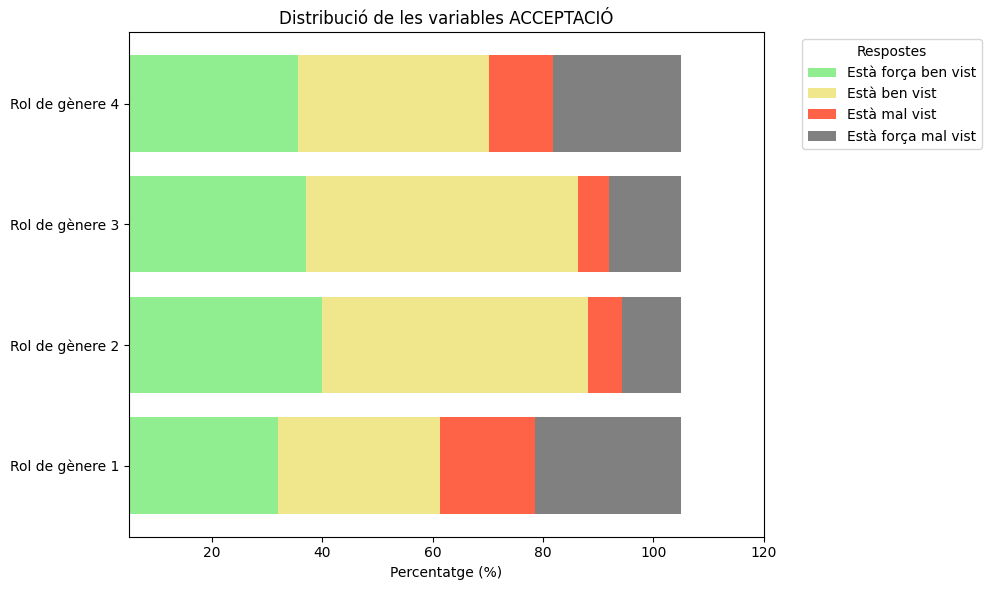

In [191]:
# Separació inicial (controla la distància inicial)
espai_inicial = 5  # Aquest valor determina la separació inicial de les barres

# Preparar les dades per a les barres apilades
bottom = np.full(len(variables_acceptacio), espai_inicial, dtype=float)  # Base inicial amb separació
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gràfic apilat horitzontal
colors = ['lightgreen', 'khaki', 'tomato', 'gray']
for cat, color in zip(categories, colors):
    ax.barh(variables_acceptacio, data_apilada[cat], left=bottom, label=cat, color=color)
    bottom += data_apilada[cat]  # Actualitzar la base per la següent capa

# Actualitzar els noms a l'eix Y
ax.set_yticks(range(len(variables_acceptacio)))
ax.set_yticklabels(noms_personalitzats)

# Ajustar la posició de l'eix X
espai_total = espai_inicial + bottom.max()  # Calcula l'espai total necessari
#ax.set_xlim(0, espai_total + 10)  # Reflectir espai inicial i ajustar marge dret
# Afegir separació inicial però mantenir alineació
ax.set_xlim(espai_inicial, bottom.max() + espai_inicial + 10)

# Configuració del format de l'eix X
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))  # Format senzill

# Afegir etiquetes i configuració
ax.set_xlabel("Percentatge (%)")
ax.set_title("Distribució de les variables ACCEPTACIÓ")
ax.legend(title="Respostes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar els marges per moure les barres cap a l'esquerra
plt.subplots_adjust(left=0.3)  # Espai addicional per als noms de les variables
plt.tight_layout()

# Mostrar el gràfic
plt.show()


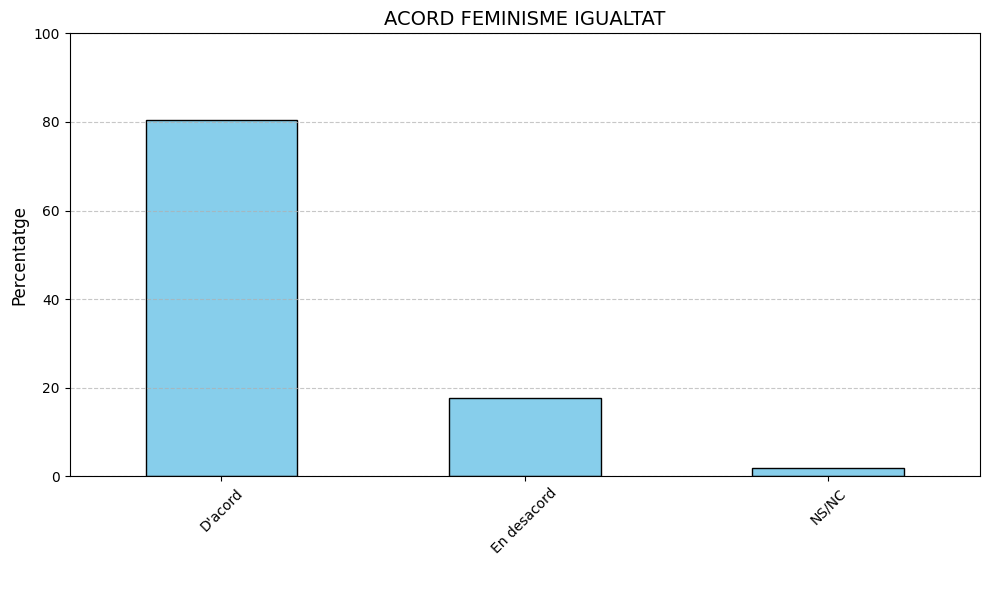

In [175]:
# Comptar les freqüències de les respostes a la variable 'ACORD_FEMINISME_CLAU'
feminisme_counts = df_filtrat['ACORD_FEMINISME_IGUALTAT'].value_counts(normalize=True)*100

# Crear el gràfic de barres
plt.figure(figsize=(10, 6))
feminisme_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar el títol i les etiquetes
plt.title('ACORD FEMINISME IGUALTAT', fontsize=14)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Percentatge', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gràfic
plt.tight_layout()
plt.show()
